In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

#from google.colab import files
#uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376800,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376801,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376802,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376803,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['continent'] != 0]

numeric_df = df.select_dtypes(include=['float64', 'int64'])
mean_values = numeric_df.mean()
df[numeric_df.columns] = numeric_df.fillna(mean_values)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,7.202762e+06,0.0,8995.878675,88906.122671,0.0,80.028251,...,32.908568,37.746,0.5,64.83,0.511,41128772.0,53939.550285,9.735756,11.034909,1741.124626
1,AFG,Asia,Afghanistan,2020-01-06,7.202762e+06,0.0,8995.878675,88906.122671,0.0,80.028251,...,32.908568,37.746,0.5,64.83,0.511,41128772.0,53939.550285,9.735756,11.034909,1741.124626
2,AFG,Asia,Afghanistan,2020-01-07,7.202762e+06,0.0,8995.878675,88906.122671,0.0,80.028251,...,32.908568,37.746,0.5,64.83,0.511,41128772.0,53939.550285,9.735756,11.034909,1741.124626
3,AFG,Asia,Afghanistan,2020-01-08,7.202762e+06,0.0,8995.878675,88906.122671,0.0,80.028251,...,32.908568,37.746,0.5,64.83,0.511,41128772.0,53939.550285,9.735756,11.034909,1741.124626
4,AFG,Asia,Afghanistan,2020-01-09,7.202762e+06,0.0,8995.878675,88906.122671,0.0,80.028251,...,32.908568,37.746,0.5,64.83,0.511,41128772.0,53939.550285,9.735756,11.034909,1741.124626


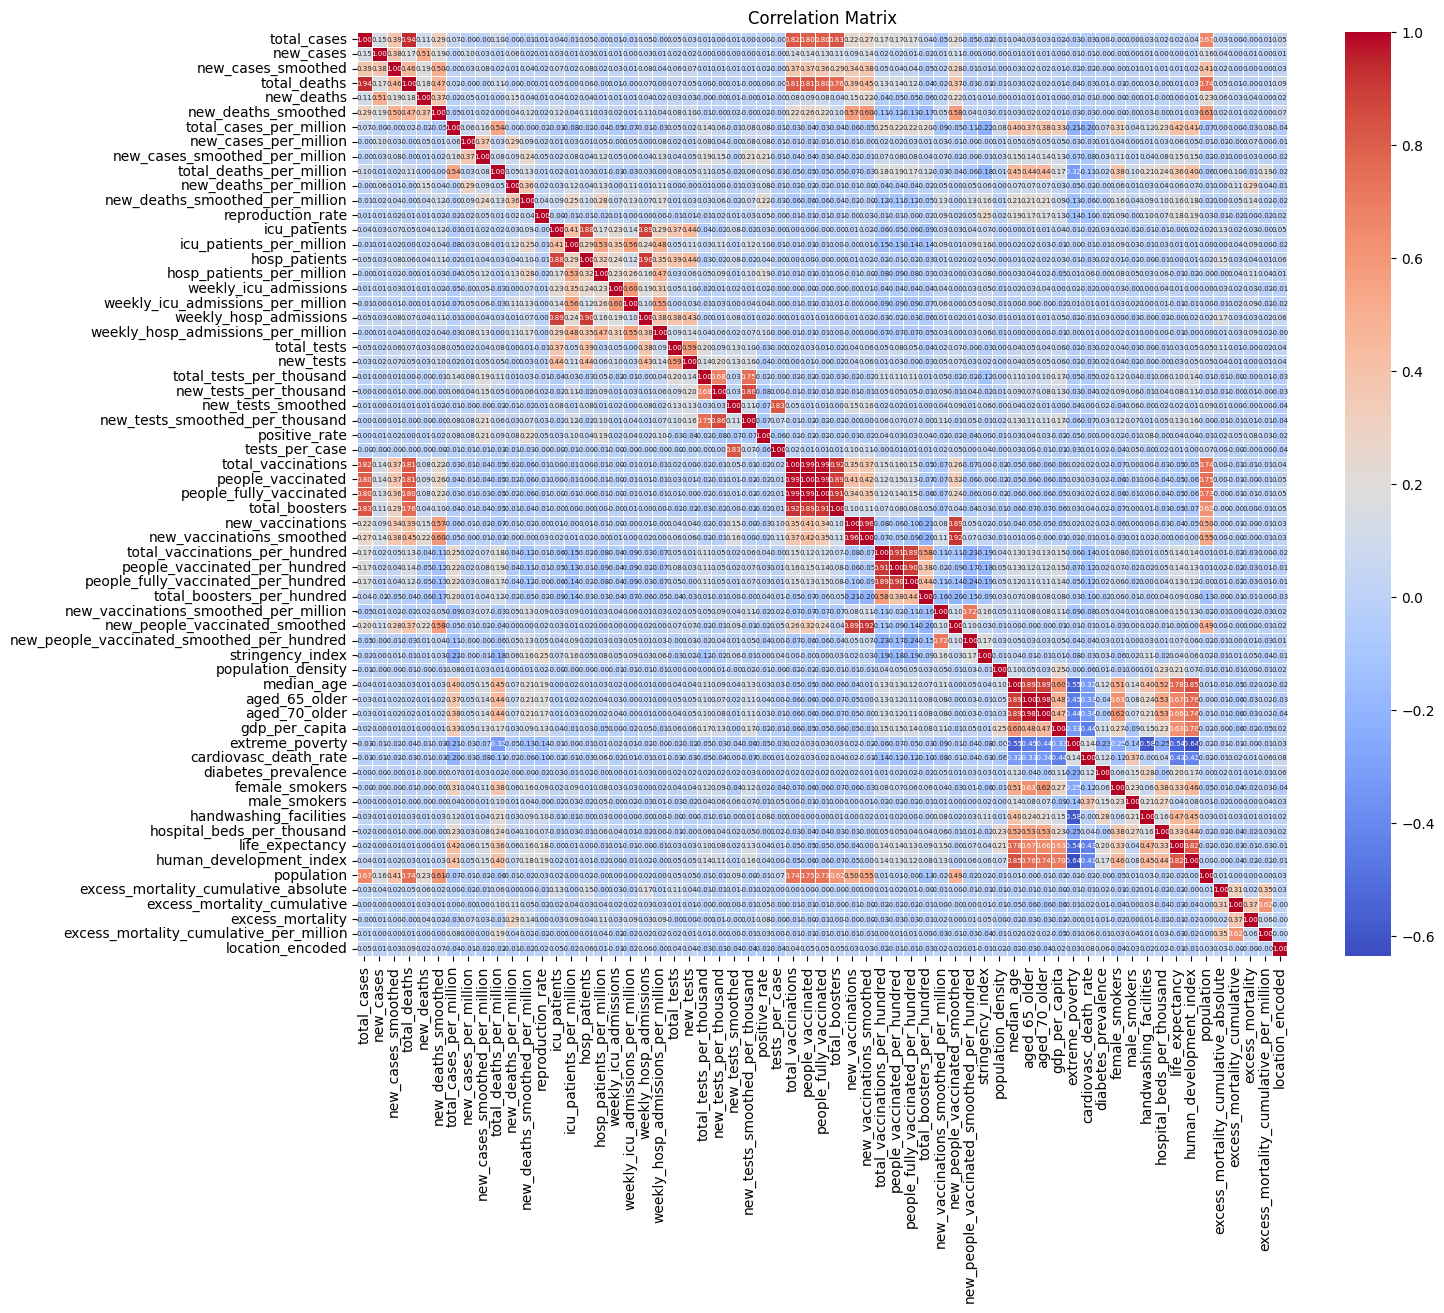

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 5})  # Decrease the font size of the annotations
plt.title('Correlation Matrix')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['location_encoded'] = label_encoder.fit_transform(df['location'])


selected_features = ['total_cases', 'handwashing_facilities' , 'weekly_icu_admissions','new_cases',
                     'life_expectancy', 'population', 'gdp_per_capita', 'hospital_beds_per_thousand',
                     'human_development_index', 'excess_mortality', 'location_encoded', 'people_vaccinated',
                     'total_vaccinations', 'extreme_poverty', 'positive_rate']

target_variable = 'new_deaths'


X = df[selected_features]
y = df[target_variable]

#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 2, min_samples_split =5, random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)



Mean Absolute Error (MAE): 20.42595931872441
Mean Squared Error (MSE): 150474.7743849814
Root Mean Squared Error (RMSE): 387.91078147556226
R-squared (R²): 0.9161638640277704
Mean Squared Error: 150474.7743849814
R-squared Score: 0.9161638640277704
